# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Your code here
data = pd.read_csv('../data/boston_data.csv')
data.head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


In [3]:
dsnull = data.isnull().sum()
print(dsnull)

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64


In [4]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.730912,10.509901,11.189901,0.069307,0.556710,6.30145,68.601733,3.799666,9.836634,411.688119,18.444554,355.068243,12.598936,22.312376
std,8.943922,22.053733,6.814909,0.254290,0.117321,0.67583,28.066143,2.109916,8.834741,171.073553,2.150295,94.489572,6.925173,8.837019
min,0.006320,0.000000,0.460000,0.000000,0.392000,3.56100,2.900000,1.169100,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082382,0.000000,5.190000,0.000000,0.453000,5.90275,45.800000,2.087875,4.000000,281.000000,17.375000,374.710000,7.135000,17.100000
50%,0.253715,0.000000,9.795000,0.000000,0.538000,6.23050,76.600000,3.207450,5.000000,330.000000,19.000000,391.065000,11.265000,21.400000
75%,4.053158,12.500000,18.100000,0.000000,0.631000,6.62925,94.150000,5.222125,24.000000,666.000000,20.200000,396.007500,16.910000,25.000000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.78000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.370000,50.000000


In [5]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR) # IQR for each column

crim         3.970775
zn          12.500000
indus       12.910000
chas         0.000000
nox          0.178000
rm           0.726500
age         48.350000
dis          3.134250
rad         20.000000
tax        385.000000
ptratio      2.825000
black       21.297500
lstat        9.775000
medv         7.900000
dtype: float64


In [6]:
data_out = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]
# calculated IQR score to filter out the outliers by keeping only valid values
data_out.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,228.000000,228.000000,228.000000,228.0,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000
mean,1.348504,4.015351,10.827939,0.0,0.538482,6.186281,66.237281,3.998012,7.671053,371.710526,18.742544,389.028509,12.086798,21.412719
std,2.504425,8.724793,6.393417,0.0,0.103290,0.428421,27.103921,1.788350,7.442090,151.906285,1.771429,11.118071,5.633787,4.971316
min,0.006320,0.000000,1.380000,0.0,0.409000,4.903000,2.900000,1.345900,1.000000,188.000000,14.700000,344.050000,2.940000,7.000000
25%,0.083672,0.000000,5.860000,0.0,0.453000,5.888000,45.800000,2.501475,4.000000,278.500000,17.800000,386.572500,7.777500,18.775000
50%,0.171310,0.000000,8.560000,0.0,0.520000,6.167000,69.650000,3.665900,5.000000,307.000000,19.100000,393.410000,10.875000,21.200000
75%,0.777345,0.000000,18.100000,0.0,0.581000,6.437250,91.125000,5.400700,6.000000,403.000000,20.200000,396.900000,15.027500,23.825000
max,9.966540,30.000000,27.740000,0.0,0.871000,7.416000,100.000000,9.222900,24.000000,711.000000,21.200000,396.900000,30.810000,36.200000


In [7]:
#data.shape # commpare how many outliers have been removed

In [8]:
#data_out.shape # commpare how many outliers have been removed = 176

### Next, we want to explore the data. Pick several varibables you think will be ost correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

In [9]:
# Your plots here
data_out.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.228475,0.530959,NaN,0.675630,-0.003755,0.417189,-0.453637,0.903573,0.819485,0.297510,-0.051648,0.378788,-0.419488
zn,-0.228475,1.000000,-0.347809,NaN,-0.411178,0.157472,-0.331976,0.614208,-0.139549,-0.247541,-0.251385,0.048902,-0.230535,0.183043
indus,0.530959,-0.347809,1.000000,NaN,0.696896,-0.203699,0.496043,-0.639473,0.477314,0.639829,0.251454,-0.267703,0.507857,-0.466695
chas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nox,0.675630,-0.411178,0.696896,NaN,1.000000,-0.204701,0.655826,-0.730475,0.560144,0.647809,0.136448,-0.239401,0.529062,-0.464772
rm,-0.003755,0.157472,-0.203699,NaN,-0.204701,1.000000,-0.132488,0.158424,0.054176,-0.028625,0.015698,0.165165,-0.588867,0.596008
age,0.417189,-0.331976,0.496043,NaN,0.655826,-0.132488,1.000000,-0.617645,0.307848,0.415347,0.191720,-0.112090,0.574761,-0.486262
dis,-0.453637,0.614208,-0.639473,NaN,-0.730475,0.158424,-0.617645,1.000000,-0.336639,-0.479069,-0.225449,0.125750,-0.408952,0.308481
rad,0.903573,-0.139549,0.477314,NaN,0.560144,0.054176,0.307848,-0.336639,1.000000,0.878876,0.346722,-0.018829,0.251185,-0.287349
tax,0.819485,-0.247541,0.639829,NaN,0.647809,-0.028625,0.415347,-0.479069,0.878876,1.000000,0.357254,-0.096153,0.347847,-0.434778


In [10]:
import matplotlib.pyplot as plt

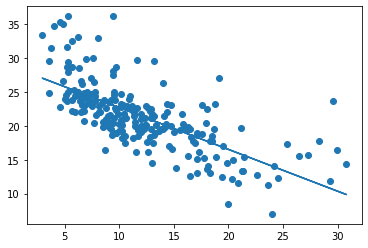

In [11]:
# lstat(-0.7), tax(-0.43), age(-0.49), rm(0.59), nox(-0.46), indus(-0.47), crim(-0.42) 
# medv

from sklearn.linear_model import LinearRegression

X = data_out['lstat'].values.reshape(-1, 1)
y = data_out['medv'].values.reshape(-1, 1)


model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

plt.scatter(X, y)
plt.plot(X, y_pred)
plt.show() 

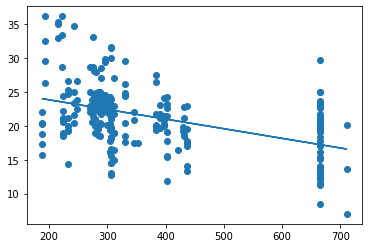

In [12]:
X = data_out['tax'].values.reshape(-1, 1)
y = data_out['medv'].values.reshape(-1, 1)


model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

plt.scatter(X, y)
plt.plot(X, y_pred)
plt.show() 

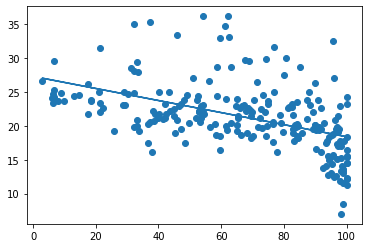

In [13]:
X = data_out['age'].values.reshape(-1, 1)
y = data_out['medv'].values.reshape(-1, 1)


model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

plt.scatter(X, y)
plt.plot(X, y_pred)
plt.show() 

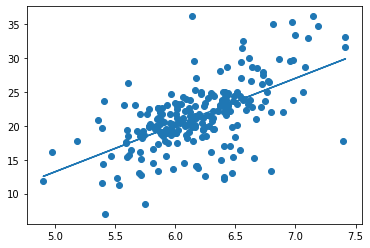

In [14]:
X = data_out['rm'].values.reshape(-1, 1)
y = data_out['medv'].values.reshape(-1, 1)


model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

plt.scatter(X, y)
plt.plot(X, y_pred)
plt.show()

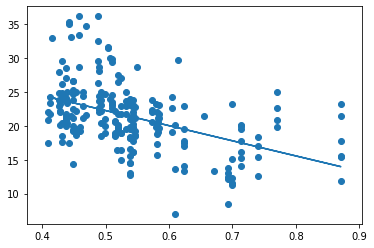

In [15]:
X = data_out['nox'].values.reshape(-1, 1)
y = data_out['medv'].values.reshape(-1, 1)


model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

plt.scatter(X, y)
plt.plot(X, y_pred)
plt.show()

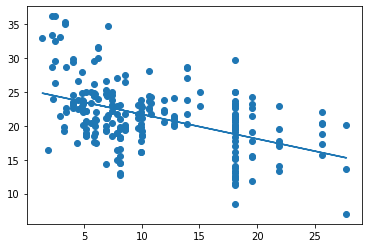

In [16]:
X = data_out['indus'].values.reshape(-1, 1)
y = data_out['medv'].values.reshape(-1, 1)


model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

plt.scatter(X, y)
plt.plot(X, y_pred)
plt.show()

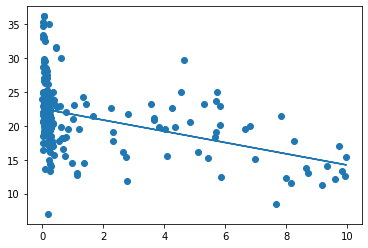

In [17]:
X = data_out['crim'].values.reshape(-1, 1)
y = data_out['medv'].values.reshape(-1, 1)


model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

plt.scatter(X, y)
plt.plot(X, y_pred)
plt.show()

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

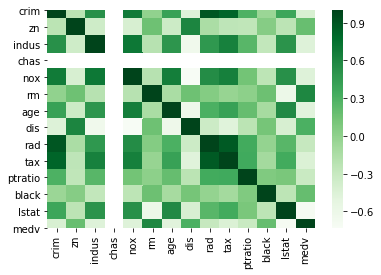

In [18]:
# Your response here
import seaborn as sns

correlation = data_out.corr()
sns.heatmap(correlation, cmap='Greens')

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [19]:
# Your code here
data_out.medv.min()

7.0

In [20]:
data_out.medv.max()

36.2

In [21]:
data_out.medv.mean()

21.412719298245612

In [22]:
data_out.medv.median()

21.2

In [23]:
data_out.medv.std()

4.9713155679282215

----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [24]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # Your code here:
    
    return r2_score(y_true,y_predict) 

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [25]:
# Your code here
# since the highest correlation found is less than 0.9,I will use the whole dataset (without outlier)
# shuffle is already default true as parameter of sklearn.model_selection.train_test_split(*arrays, **options)

from sklearn.model_selection import train_test_split

y = data_out['medv']
X = data_out.drop(['medv'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [26]:
data_out.shape

(228, 14)

In [27]:
X.shape

(228, 13)

In [28]:
y.shape

(228,)

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

0.6428268830653479
0.5974225051792024
0.6061431854538549
0.6253082908078759
0.6517195368459064


C:\Users\const\Anaconda3\envs\ironhack\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\const\Anaconda3\envs\ironhack\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\const\Anaconda3\envs\ironhack\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\const\Anaconda3\envs\ironhack\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\const\Anaco

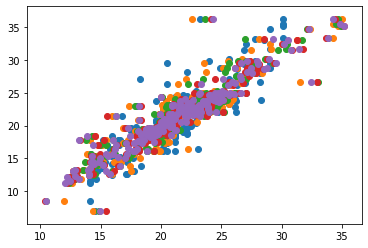

In [29]:
# Five separate RFR here with the given max depths

from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

m_para = [2,4,6,8,10]

for m in m_para:
    regr = RandomForestRegressor(max_depth=m, random_state=0)
    model = regr.fit(X_train,y_train)
    y_pred = model.predict(X)
    print(model.score(X_test,y_test)) 
    plt.scatter(y_pred, y)

Now, plot the score for each tree on the training set and on the testing set.

0.6428268830653479


C:\Users\const\Anaconda3\envs\ironhack\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


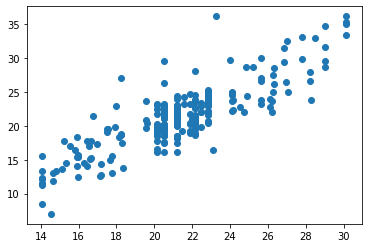

In [30]:
regr = RandomForestRegressor(max_depth=2, random_state=0)
model = regr.fit(X_train,y_train)
y_pred = model.predict(X)
print(model.score(X_test,y_test)) 
plt.scatter(y_pred, y)

In [31]:
performance_metric(y,y_pred)

0.7015379665901957

0.5974225051792024


C:\Users\const\Anaconda3\envs\ironhack\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


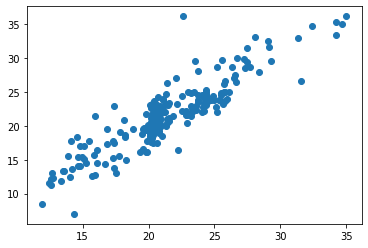

In [32]:
regr = RandomForestRegressor(max_depth=4, random_state=0)
model = regr.fit(X_train,y_train)
y_pred = model.predict(X)
print(model.score(X_test,y_test)) 
plt.scatter(y_pred, y)

In [33]:
performance_metric(y,y_pred)

0.797208382434053

0.6061431854538549


C:\Users\const\Anaconda3\envs\ironhack\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


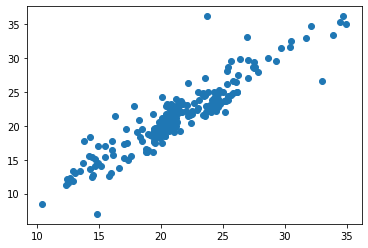

In [34]:
regr = RandomForestRegressor(max_depth=6, random_state=0)
model = regr.fit(X_train,y_train)
y_pred = model.predict(X)
print(model.score(X_test,y_test)) 
plt.scatter(y_pred, y)

In [35]:
performance_metric(y,y_pred)

0.8466517438235024

0.6253082908078759


C:\Users\const\Anaconda3\envs\ironhack\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


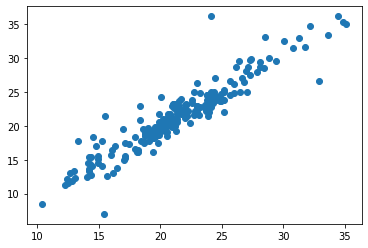

In [36]:
regr = RandomForestRegressor(max_depth=8, random_state=0)
model = regr.fit(X_train,y_train)
y_pred = model.predict(X)
print(model.score(X_test,y_test)) 
plt.scatter(y_pred, y)

In [37]:
performance_metric(y,y_pred)

0.869216226999273

0.6517195368459064


C:\Users\const\Anaconda3\envs\ironhack\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


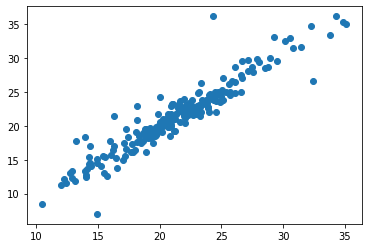

In [38]:
regr = RandomForestRegressor(max_depth=10, random_state=0)
model = regr.fit(X_train,y_train)
y_pred = model.predict(X)
print(model.score(X_test,y_test)) 
plt.scatter(y_pred, y)

In [41]:
performance_metric(y,y_pred)

0.884007033638567

What do these results tell you about the effect of the depth of the trees on the performance of the model?

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*